# By: Azeez Adewale HAMZAT
# School of Collective Intelligence, Mohammed VI Polytechnic University
# January, 2022

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import the evaluation dataset
df = pd.read_csv('/content/Political Evaluation_RenamedColumns.csv')
df.head(10)

,Timestamp,Knowledge_rating,age_distribution,Political_feeling,Value,Advice,Proposed_solution,Current_situation,Education_level,Current_state,Gender
0,2022/01/13 2:40:42 AM GMT+1,6,Between 28 years or above,One of the worst forms of democracy ever witne...,Family,Get another passport and leave.,Re-colonisation.,"NO, it is getting worse",College or University,Ogun,Female
1,2022/01/13 2:59:56 AM GMT+1,5,Between 23 - 27 years,1. The youths are pushed back from any major r...,My family. The church. Friends.,A young person at most 45 and at least 35. Lis...,Monopoly\nSelfishness and greed\nMyopia,"NO, it is getting worse",Masters,Oyo,Female
2,2022/01/13 3:40:05 AM GMT+1,3,Between 18 - 22 years,The political situation in Nigeria since the p...,My families and friends,"Do the best that you can give, be truthful, fu...",Each leader should have the fear of God instil...,"NO, it is getting worse",College or University,Ogbomosho,Female
3,2022/01/13 3:58:45 AM GMT+1,7,Between 28 years or above,There is no improvement in the political situa...,Family,"To be God-fearing, incorruptible and just.",The solution is to be blessed with God-fearing...,"NO, it is getting worse",College or University,Kwara state,Male
4,2022/01/13 4:02:25 AM GMT+1,6,Between 28 years or above,Unfair and Injustice,Family,Eradicate and restore all the political post,Aforetyped,"NO, it is getting worse",College or University,Kwara,Male
5,2022/01/13 5:38:42 AM GMT+1,3,Between 28 years or above,Feel unhappy,Family,They should be honest and not to be selfish,Honest leader,"NO, it is getting worse",College or University,Kwara,Male
6,2022/01/13 6:04:00 AM GMT+1,4,Between 28 years or above,The political situation in Nigeria is becoming...,"The enjoyment in education, health and other a...",The future leaders should take cognizant of ec...,An improved electioneering system should be ad...,It is the same,College or University,Kwara,Male
7,2022/01/13 6:18:44 AM GMT+1,1,Between 28 years or above,"Insecurity, unemployment and poor economic",Family,"To provide maximum security, To solve unemploy...",To fulfill their promises,It is the same,College or University,Oyo state,Male
8,2022/01/13 7:02:07 AM GMT+1,4,Between 18 - 22 years,Nigeria political is full of lack of rule of l...,Family,My advise for him/her is to fear God because w...,We apply the rules of substitution method,"NO, it is getting worse",College or University,Oyo,Male
9,2022/01/13 7:06:15 AM GMT+1,4,Between 28 years or above,"It's full of challenges like Vast corruption, ...",Education,"To be keeping his/her word, building others up...",By allowing youth into the system,"YES, it is getting better",College or University,Oyo,Male


In [ ]:
df.drop(['Timestamp'], axis=1)

,Knowledge_rating,age_distribution,Political_feeling,Value,Advice,Proposed_solution,Current_situation,Education_level,Current_state,Gender
0,6,Between 28 years or above,One of the worst forms of democracy ever witne...,Family,Get another passport and leave.,Re-colonisation.,"NO, it is getting worse",College or University,Ogun,Female
1,5,Between 23 - 27 years,1. The youths are pushed back from any major r...,My family. The church. Friends.,A young person at most 45 and at least 35. Lis...,Monopoly\nSelfishness and greed\nMyopia,"NO, it is getting worse",Masters,Oyo,Female
2,3,Between 18 - 22 years,The political situation in Nigeria since the p...,My families and friends,"Do the best that you can give, be truthful, fu...",Each leader should have the fear of God instil...,"NO, it is getting worse",College or University,Ogbomosho,Female
3,7,Between 28 years or above,There is no improvement in the political situa...,Family,"To be God-fearing, incorruptible and just.",The solution is to be blessed with God-fearing...,"NO, it is getting worse",College or University,Kwara state,Male
4,6,Between 28 years or above,Unfair and Injustice,Family,Eradicate and restore all the political post,Aforetyped,"NO, it is getting worse",College or University,Kwara,Male
...,...,...,...,...,...,...,...,...,...,...
77,4,Between 28 years or above,Worst,Family,To use resources judiciously,Discipline,"NO, it is getting worse",College or University,Oyo,Male
78,7,Between 28 years or above,Nigeria politics has been detrimental for the...,"Family, friend","Although, our advice cannot reach most of our ...",Many views will come on this point as Nigerian...,"NO, it is getting worse",Post University,Oyo state,Male
79,4,Between 28 years or above,It's been a bugaboo,Family and Friends,"To be honest, because honesty is the best poli...",Honesty,"NO, it is getting worse",B. TECH,Oyo,Male
80,4,Between 28 years or above,"Full of corruption, bad leadership, bad influ...",Non-thing,"Future leader need to be Self discipline, the...",Allow each region to rule her region by themse...,"NO, it is getting worse",College or University,Oyo,Male


In [ ]:
df.shape

(82, 11)

In [ ]:
df['Education_level'].value_counts()

College or University    74
Secondary                 2
Post University           1
B.A.                      1
Masters                   1
B. TECH                   1
Postgraduate              1
Post graduate             1
Name: Education_level, dtype: int64

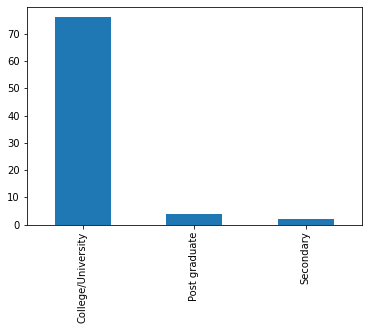

In [ ]:
df['Education_level'] = df['Education_level'].replace(['Post graduate ','Postgraduate','Post University','Masters'], 'Post graduate', regex=True)
df['Education_level'] = df['Education_level'].replace(['College or University','B.A.','B. TECH'], 'College/University')
df['Education_level'].value_counts().plot(kind='bar');

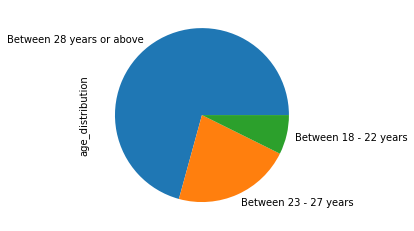

In [ ]:
df['age_distribution'].value_counts().plot(kind='pie')

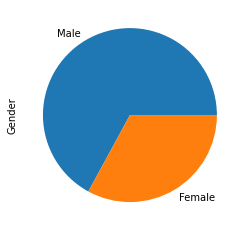

In [ ]:
df['Gender'].value_counts().plot(kind='pie')

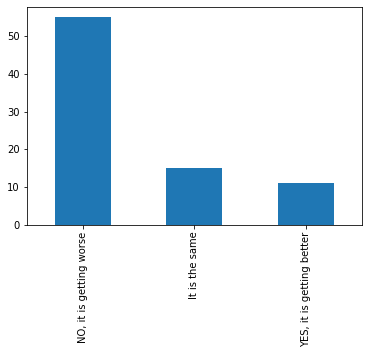

In [ ]:
df['Current_situation'].value_counts().plot(kind='bar')

In [ ]:
df['Current_state'].value_counts()

Oyo                                                                                     28
Kwara                                                                                   12
Lagos                                                                                    7
Ogun                                                                                     5
Oyo state                                                                                5
Kwara state                                                                              3
Lagos                                                                                    3
Osun                                                                                     2
OYO                                                                                      2
Ondo                                                                                     2
Oyo State                                                                                2

In [ ]:
df.Current_state = df.Current_state.replace(['Oyo','Oyo state','Oyo State ','OYO','Oyo State', 'Oyo State','Ibadan','Ogbomosho'], 'Oyo State')
df.Current_state = df.Current_state.replace(['Kwara State','Kwara state','Kwara'], 'Kwara State')
df.Current_state = df.Current_state.replace(['Ogun'],'Ogun State')
df.Current_state = df.Current_state.replace(['Lagos','Lagos ', 'Lagos'],'Lagos State')
df.Current_state = df.Current_state.replace(['Osun State','Osun',],'Osun State')
df.Current_state = df.Current_state.replace(['Abuja','F. C. T. Abuja ','FCT'], 'F.C.T')
df.Current_state = df.Current_state.replace(['Cross river'], 'Cross river state')
df.Current_state = df.Current_state.replace(['I am abroad because the system is not favourable for citizens because of corruption.'], 'abroad')
df.Current_state = df.Current_state.replace(['Ondo state','Ondo'], 'Ondo state')

In [ ]:
df['Current_state'].value_counts()

Oyo State            40
Kwara State          16
Lagos State          10
Ogun State            5
Ondo state            3
Osun State            3
F.C.T                 3
abroad                1
Cross river state     1
Name: Current_state, dtype: int64

## Geographical location of the respondents

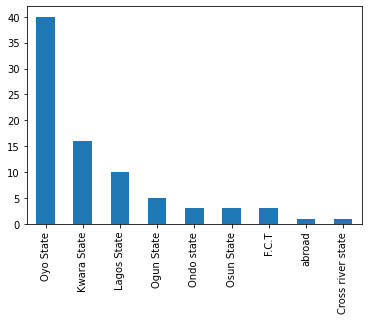

In [ ]:
df['Current_state'].value_counts().plot(kind='bar');

* We have responses from 9 states out of the 36 states in Nigeria, and a response from abroad. With this 9 representative states, we can be sure that we have information about the whole nation.

## Our peoples' level of political awareness

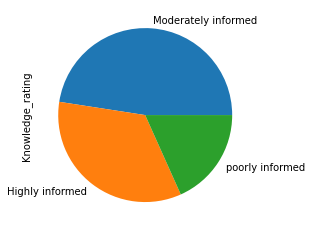

In [ ]:
df['Knowledge_rating'] = df['Knowledge_rating'].replace([1,2, 3], 'poorly informed', regex=True)
df['Knowledge_rating'] = df['Knowledge_rating'].replace([5,6, 7], 'Highly informed', regex=True)
df['Knowledge_rating'] = df['Knowledge_rating'].replace([4], 'Moderately informed', regex=True)
df['Knowledge_rating'].value_counts().plot(kind='pie')

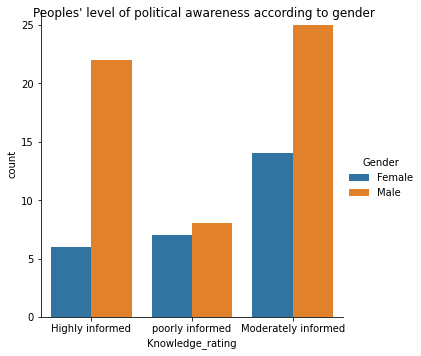

In [ ]:
import seaborn as sns
awareness = sns.catplot(x="Knowledge_rating", hue="Gender", kind="count", data=df);
awareness.fig.suptitle("Peoples' level of political awareness according to gender");

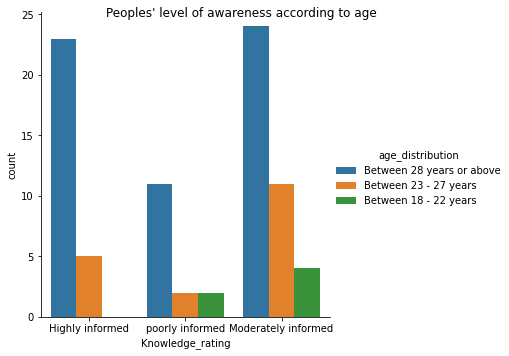

In [ ]:
Knowledge_rating = sns.catplot(x="Knowledge_rating", hue="age_distribution", kind="count", data=df);
Knowledge_rating.fig.suptitle("Peoples' level of awareness according to age");

In [ ]:
## First we install the potentially important packages

!pip install unidecode
!pip install word2number
!pip install contractions
!pip install bs4
!pip install nltk
!pip install inflect

In [ ]:
## Then we import the modules

from bs4 import BeautifulSoup
import unidecode
from word2number import w2n
import contractions
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
## Here we follow the structure of the class slides 
## we go through the functions necessary to preprocess a typical online product review

## We start with an unclean string 
string = df.Political_feeling[0]

In [ ]:
## This function removes any mention to website 
## this application of re.sub() substitutes strings in the input starting with http with ''

def clean_url(input):
  output = re.sub(r'http\S+', '', input)
  return output

## we take the original string and then apply the function clean_url, obtaining the string after_url_clean
after_url_clean = clean_url(string)

## We print the string after removing url
print(after_url_clean)

One of the worst forms of democracy ever witnessed in my entire existence is what is currently practised in Nigeria. The country is basically a ticking time bomb. 


In [ ]:
## This function fixes contractions - turns "don't" into "do not", or "can't" into "can not"

def fix_contraction(input):
  output = contractions.fix(input)
  return output

## we store the fixed string into the variable contractions_fixed and print it

contractions_fixed = fix_contraction(after_url_clean)
print (contractions_fixed)

One of the worst forms of democracy ever witnessed in my entire existence is what is currently practised in Nigeria. The country is basically a ticking time bomb. 


In [ ]:
## This function finds all non-alphanumeric characters [^a-zA-Z] and substitutes them with '' 
## [^a-zA-Z0-9] finds all alphanumeric characters, ^ is the negation.

def clean_non_alphanumeric(input):
  output = re.sub(r'[^a-zA-Z0-9]', ' ', input)
  return output

## Now we apply the function clean_non_alphabetic to remove non-alphanumeric and store the output in the variable only_alphanumeric
only_alphanumeric = clean_non_alphanumeric(contractions_fixed)

# and print the output
print(only_alphanumeric)

One of the worst forms of democracy ever witnessed in my entire existence is what is currently practised in Nigeria  The country is basically a ticking time bomb  


In [ ]:
## This function takes a string with both lower and upper case elements and returns only lower case elements

def clean_lowercase(input):
  output = str(input).lower()
  return output

## We apply the function clean_lowercase and store the output in the variable lower_cased and print it
lower_cased = clean_lowercase(only_alphanumeric)
print(lower_cased)

one of the worst forms of democracy ever witnessed in my entire existence is what is currently practised in nigeria  the country is basically a ticking time bomb  


In [ ]:
## The function word_tokenize is a standard function from the module nltk
## if you want to use it you need to import it:
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize

## The function tokenize takes a string as input and returns a list of tokens 
## tokens are items separated by spaces ' ', normally words

def clean_tokenization(input):
  output = word_tokenize(input)
  return output

## we apply the function clean_tokenization and stote the output in the variable tokenized

tokenized = clean_tokenization(lower_cased)
print(tokenized)

['one', 'of', 'the', 'worst', 'forms', 'of', 'democracy', 'ever', 'witnessed', 'in', 'my', 'entire', 'existence', 'is', 'what', 'is', 'currently', 'practised', 'in', 'nigeria', 'the', 'country', 'is', 'basically', 'a', 'ticking', 'time', 'bomb']


In [ ]:
## Text analysis is more accurate when we remove the most common words from the list of tokens
## Hypercommon words are called stop words, and there is a list of stopwords for every language.

## first we import the module of stopwords from nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

## We can have a look at the list of english stopwords 
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
## now we create a function that removes all stopwords

## first we set a variable for the list of english stopwords
## the function set() just eliminates repetitions
stop_words = set(stopwords.words('english'))

## now we eliminate all non stop words.
## the syntax [item for item in token if item not in stop_words] is equivalent to:
## output = []
##  for item in input: 
##    if item not in stop_words:
##      output += [item]

## this hust takes a list of elements and creates a new lsit contianing only words taht are not stopwords
## += just means to add an element to the list
## output += [item] is equivalent to: output = output + [item]   

def clean_stopwords(input):
  output = [item for item in input if item not in stop_words]
  return output

## we apply the function clean_stopwords and print the output stored in without_stop_words
without_stop_words = clean_stopwords(tokenized)
print(without_stop_words)

['one', 'worst', 'forms', 'democracy', 'ever', 'witnessed', 'entire', 'existence', 'currently', 'practised', 'nigeria', 'country', 'basically', 'ticking', 'time', 'bomb']


In [ ]:
## This function turns numeric values into words, "6" into "six"
## we need to use the module inflect for this
import inflect

## we create a variable for the engine of the module inflect
p = inflect.engine()

## if the item in the list is a number (if item isnumeric()==True),then we apply the function p.number_to_words() from the module inflect
## if it is not a number, then we just add the item to the output list as it is

def numbers_to_words(input):
  output =[]
  for item in input:
    if item.isnumeric()==True:
      output += [p.number_to_words(item)]
    else:
      output +=[item]
  return output

## we apply the function clean_lemmatization and print the output, stored in the variable lemmatized
fixed_numbers = numbers_to_words(without_stop_words)
print(fixed_numbers)

['one', 'worst', 'forms', 'democracy', 'ever', 'witnessed', 'entire', 'existence', 'currently', 'practised', 'nigeria', 'country', 'basically', 'ticking', 'time', 'bomb']


In [ ]:
## Now it is time to lemmatize the tokens of out list
## Lemmatizing is to transform related words into their root, so that they are counted as several instances of the same word.
## for example run, running , ran are all different words but they should be counted as 3 instances of the verb 'run'
## in order to avoid that python takes them as the different words, we need to lemmatize our list of tokens

## first we import the lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

## we need to store the lemmatizer into a variable
lemma = WordNetLemmatizer()

## for word (w) in input list, we lemmatize the word
## [lemma.lemmatize(word=w) for w in input]

def clean_lemmatization(input):
  output = [lemma.lemmatize(word=w, pos='v') for w in input]
  return output

## we apply the function clean_lemmatization and print the output, stored in the variable lemmatized
lemmatized = clean_lemmatization(fixed_numbers)
print(lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['one', 'worst', 'form', 'democracy', 'ever', 'witness', 'entire', 'existence', 'currently', 'practise', 'nigeria', 'country', 'basically', 'tick', 'time', 'bomb']


In [ ]:
## in this step we take the lemmatized list and remove items which are not likely to be words (after removing stopwords like I, am, at, etc.... which are all stop words and already removed)

## in this function we create a new list that includes only words with lenght > 2

def clean_length(input):
  output= [word for word in input if len(word) > 2]
  return output

## we apply the function clean length and print the output stored as bigger_than_two
bigger_than_two = clean_length(lemmatized)
print(bigger_than_two)

['one', 'worst', 'form', 'democracy', 'ever', 'witness', 'entire', 'existence', 'currently', 'practise', 'nigeria', 'country', 'basically', 'tick', 'time', 'bomb']


In [ ]:
## COUNT WORD FREQUENCIES

## Once we have a preprocessed list, we can do things like counting the frequency of words in that list/sentence
## we use nltk function nltk.FreqDist(list), and list the frequency distribution using the function .most_common()

def count_word_frequencies(input):
  # we get the word count
  word_count = nltk.FreqDist(input)
  # we build a list of word counts, from more frequent word to less frequent
  word_count_most_common= word_count.most_common()
  # to get the frequencies, we need to divide the word count by the number of words in the sentence, i.e. len(input)
  output = [(count[0],count[1]/len(input)) for count in word_count_most_common]

  return output

## we no apply the function
word_frequencies = count_word_frequencies(bigger_than_two)
print(word_frequencies)

[('one', 0.0625), ('worst', 0.0625), ('form', 0.0625), ('democracy', 0.0625), ('ever', 0.0625), ('witness', 0.0625), ('entire', 0.0625), ('existence', 0.0625), ('currently', 0.0625), ('practise', 0.0625), ('nigeria', 0.0625), ('country', 0.0625), ('basically', 0.0625), ('tick', 0.0625), ('time', 0.0625), ('bomb', 0.0625)]


In [ ]:
## finally, after al the filtering steps, we can put the string back together
## we just convert the list into a string using ' '.join(list)

def convert_to_string(input):
  output = ' '.join(input)
  return output

## we apply the function convert_to_string
filtered_string = convert_to_string(bigger_than_two)
print(filtered_string)

one worst form democracy ever witness entire existence currently practise nigeria country basically tick time bomb


In [ ]:
## we import all the modules
from bs4 import BeautifulSoup
import unidecode
from word2number import w2n
import contractions
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import inflect
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

## these are variables that our functions need
stop_words = set(stopwords.words('english'))
lemma=WordNetLemmatizer()
p = inflect.engine()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
## WE DEFINE ALL THE FUNCTIONS WE WILL NEED

## This function removes any mention to website 
## this application of re.sub() substitutes strings in the input starting with http with ''
def clean_url(input):
  output = re.sub(r'http\S+', '', input)
  return output

## This function fixes contractions - turns "don't" into "do not", or "can't" into "can not"
def fix_contraction(input):
  output = contractions.fix(input)
  return output

## This function finds all non-alphanumeric characters [^a-zA-Z] and substitutes them with '' 
def clean_non_alphanumeric(input):
  output = re.sub(r'[^a-zA-Z0-9]', ' ', input)
  return output

## This function takes a string with both lower and upper case elements and returns only lower case elements
def clean_lowercase(input):
  output = str(input).lower()
  return output

## The function tokenize takes a string as input and returns a list of tokens 
def clean_tokenization(input):
  output = word_tokenize(input)
  return output

## eliminate stop words
def clean_stopwords(input):
  output = [item for item in input if item not in stop_words]
  return output

## This function turns numeric values into words, "6" into "six"
def numbers_to_words(input):
  output =[]
  for item in input:
    if item.isnumeric()==True:
      output += [p.number_to_words(item)]
    else:
      output +=[item]
  return output

## Lemmatize tokens
def clean_lemmatization(input):
  output = [lemma.lemmatize(word=w, pos='v') for w in input]
  return output

## in this function we create a new list that includes only words with lenght > 2
def clean_length(input):
  output= [word for word in input if len(word) > 2]
  return output

## COUNT WORD FREQUENCIES
def count_word_frequencies(input):
  word_count = nltk.FreqDist(input)
  word_count_most_common= word_count.most_common()
  output = [(count[0],count[1]/len(input)) for count in word_count_most_common]
  return output

## finally, after al the filtering steps, we can put the string back together
def convert_to_string(input):
  output = ' '.join(input)
  return output



In [ ]:
## We define the pipeline as a function

def pre_processing_pipeline(input):
  after_url_clean = clean_url(input)
  contractions_fixed = fix_contraction(after_url_clean)
  only_alphanumeric = clean_non_alphanumeric(contractions_fixed)
  lower_cased = clean_lowercase(only_alphanumeric)
  tokenized = clean_tokenization(lower_cased)
  fixed_numbers = numbers_to_words(tokenized)
  without_stop_words = clean_stopwords(fixed_numbers)
  lemmatized = clean_lemmatization(without_stop_words)
  bigger_than_two = clean_length(lemmatized)
  word_frequencies = count_word_frequencies(bigger_than_two)
  filtered_string = convert_to_string(bigger_than_two)

  return(filtered_string,word_frequencies,bigger_than_two)

In [ ]:
## we can apply this piece of code, and with one line have the whole pipeline

string = df.Political_feeling[0]

preprocessed = pre_processing_pipeline(string)

# we can obtain the preprocessed sentence
print(preprocessed[0])

## OR

# we can obtain the word frequencies
print(preprocessed[1])

## OR

# we can obtain the word list
print(preprocessed[2])


one worst form democracy ever witness entire existence currently practise nigeria country basically tick time bomb
[('one', 0.0625), ('worst', 0.0625), ('form', 0.0625), ('democracy', 0.0625), ('ever', 0.0625), ('witness', 0.0625), ('entire', 0.0625), ('existence', 0.0625), ('currently', 0.0625), ('practise', 0.0625), ('nigeria', 0.0625), ('country', 0.0625), ('basically', 0.0625), ('tick', 0.0625), ('time', 0.0625), ('bomb', 0.0625)]
['one', 'worst', 'form', 'democracy', 'ever', 'witness', 'entire', 'existence', 'currently', 'practise', 'nigeria', 'country', 'basically', 'tick', 'time', 'bomb']


In [ ]:
## we can apply this piece of code, and with one line have the whole pipeline

string1 = df.Advice[0]

preprocessed1 = pre_processing_pipeline(string1)

# we can obtain the preprocessed sentence
print(preprocessed1[0])

## OR

# we can obtain the word frequencies
print(preprocessed1[1])

## OR

# we can obtain the word list
print(preprocessed1[2])


get another passport leave
[('get', 0.25), ('another', 0.25), ('passport', 0.25), ('leave', 0.25)]
['get', 'another', 'passport', 'leave']


In [ ]:
## we can apply this piece of code, and with one line have the whole pipeline

string2 = df.Proposed_solution[0]

preprocessed2 = pre_processing_pipeline(string2)

# we can obtain the preprocessed sentence
print(preprocessed2[0])

## OR

# we can obtain the word frequencies
print(preprocessed2[1])

## OR

# we can obtain the word list
print(preprocessed2[2])

colonisation
[('colonisation', 1.0)]
['colonisation']


In [ ]:
## we can apply this piece of code, and with one line have the whole pipeline

string3 = df.Value[0]

preprocessed3 = pre_processing_pipeline(string3)

# we can obtain the preprocessed sentence
print(preprocessed3[0])

## OR

# we can obtain the word frequencies
print(preprocessed3[1])

## OR

# we can obtain the word list
print(preprocessed3[2])

family
[('family', 1.0)]
['family']


In [ ]:
for evaluate in df['Political_feeling']:
  print(evaluate)

One of the worst forms of democracy ever witnessed in my entire existence is what is currently practised in Nigeria. The country is basically a ticking time bomb. 
1. The youths are pushed back from any major role so old ideas which do not work anymore are being recycled
2. We have never really gained independence because international communities are comfortable with the crises since it benefits them
3. Monopoly of power, although common elsewhere is of topmost concern to its citizens.
4. Nothing has been done about the brutal killings of people in the North, up until some days ago where people were being burned alive and they made a video of it
5. If the people react to this injustice, they are killed or humiliated.

We do not have a country, hence politics are just mere words to me for now. The politics done is just mere feudalism
The political situation in Nigeria since the past 10 years has been in decaying, where violence and corruption has taken over. In the election process, vo

In [ ]:
for evaluate in df['Advice']:
  print(evaluate)

Get another passport and leave.
A young person at most 45 and at least 35. Listen to the people, listen to the news not just your aides. Then serve them. Public favoritism has never favoured anyone, be empathetic. Choose excellence over 'na my person'. Be plain about the use of funds. Create an environment where businesses can thrive. Let every citizen benefit from the returns of natural resources. Let truth and fairness be the watchword of the force 
Do the best that you can give, be truthful, fulfilling your promises and be a leader that is worth emulating, the goal is to serve the people you are elected to rule not to serve yourself and your family alone.
To be God-fearing, incorruptible and just.
Eradicate and restore all the political post
They should be honest and not to be selfish 
The future leaders should take cognizant of economy improvement and be more sensitive and active in recorporating the security stability and good governance
To provide maximum security, To solve unemp

In [ ]:
for evaluate in df['Proposed_solution']:
  print(evaluate)

Re-colonisation. 
Monopoly
Selfishness and greed
Myopia
Each leader should have the fear of God instill in them, and penalties should be given to leaders that failed to fulfill their mandate at the end of their tenure.
The solution is to be blessed with God-fearing leaders who could change Mal situations from the top down to the base of Mal situations within the followers
Aforetyped
Honest leader
An improved electioneering system should be adopted to ensure more credibility in vote cast in order to elect a charismatic, patriotic leaders with leader good leadership qualities.
To fulfill their promises 
We apply the rules of substitution method 
By allowing youth into the system
The solution is embarking on choosing leader by merit not by influence.
To have a set goal
Reduction in the level of corruption by political leaders 
Love for humanity
Prayer and voting for personality not party
What I think is the solution is for everybody to be responsible
Revolution
The people particularly the

In [ ]:
for evaluate in df['Value']:
  print(evaluate)

Family
My family. The church. Friends.
My families and friends
Family
Family
Family 
The enjoyment in education, health and other aspects in Nigeria are declining and this become less enjoyable. However, the Family and friends seems to be fair
Family 
Family 
Education
Family
My family and friends
Family and friends 
Family
Family
I value the people, Nigerians have developed tough skin to the problems of Nigeria and her leaders
Activism of the rugged activists
Friends
Nothing specially. 
Family 
I value my family and friends 
Family
Family, health, friends, religion, education 
nothing
Family and friends
Family, friends and faith.
Family
None 
family and friends 
Family
Friends
Family,Friends 
Education

Non everywhere is corrupted
Family
None
Nothing for now 
My family
Education  and health is also improving 
Family and friends
Family
Family 
I will still reiterate that nothing has been working so far. We are just suffering and smiling at the same time.
Education
Family
Family and edu

In [ ]:
## for each review we can have the clean text and word frequencies 

for evaluate in df['Political_feeling'].apply(pre_processing_pipeline):
  
  ## print preprocessed text
  print(evaluate[0])

  ## print word frequencies
  print(evaluate[1])

  ## print word list
  print(evaluate[2])

  print('\n')


one worst form democracy ever witness entire existence currently practise nigeria country basically tick time bomb
[('one', 0.0625), ('worst', 0.0625), ('form', 0.0625), ('democracy', 0.0625), ('ever', 0.0625), ('witness', 0.0625), ('entire', 0.0625), ('existence', 0.0625), ('currently', 0.0625), ('practise', 0.0625), ('nigeria', 0.0625), ('country', 0.0625), ('basically', 0.0625), ('tick', 0.0625), ('time', 0.0625), ('bomb', 0.0625)]
['one', 'worst', 'form', 'democracy', 'ever', 'witness', 'entire', 'existence', 'currently', 'practise', 'nigeria', 'country', 'basically', 'tick', 'time', 'bomb']


one youths push back major role old ideas work anymore recycle two never really gain independence international communities comfortable crises since benefit three monopoly power although common elsewhere topmost concern citizens four nothing brutal kill people north days ago people burn alive make video five people react injustice kill humiliate country hence politics mere word politics mere 

In [ ]:
## for each review we can have the clean text and word frequencies 

for evaluate in df['Advice'].apply(pre_processing_pipeline):
  
  ## print preprocessed text
  print(evaluate[0])

  ## print word frequencies
  print(evaluate[1])

  ## print word list
  print(evaluate[2])

  print('\n')


get another passport leave
[('get', 0.25), ('another', 0.25), ('passport', 0.25), ('leave', 0.25)]
['get', 'another', 'passport', 'leave']


young person forty-five least thirty-five listen people listen news aid serve public favoritism never favour anyone empathetic choose excellence person plain use fund create environment businesses thrive let every citizen benefit return natural resources let truth fairness watchword force
[('person', 0.05128205128205128), ('listen', 0.05128205128205128), ('let', 0.05128205128205128), ('young', 0.02564102564102564), ('forty-five', 0.02564102564102564), ('least', 0.02564102564102564), ('thirty-five', 0.02564102564102564), ('people', 0.02564102564102564), ('news', 0.02564102564102564), ('aid', 0.02564102564102564), ('serve', 0.02564102564102564), ('public', 0.02564102564102564), ('favoritism', 0.02564102564102564), ('never', 0.02564102564102564), ('favour', 0.02564102564102564), ('anyone', 0.02564102564102564), ('empathetic', 0.02564102564102564), ('

In [ ]:
## for each review we can have the clean text and word frequencies 

for evaluate in df['Proposed_solution'].apply(pre_processing_pipeline):
  
  ## print preprocessed text
  print(evaluate[0])

  ## print word frequencies
  print(evaluate[1])

  ## print word list
  print(evaluate[2])

  print('\n')


colonisation
[('colonisation', 1.0)]
['colonisation']


monopoly selfishness greed myopia
[('monopoly', 0.25), ('selfishness', 0.25), ('greed', 0.25), ('myopia', 0.25)]
['monopoly', 'selfishness', 'greed', 'myopia']


leader fear god instill penalties give leaders fail fulfill mandate end tenure
[('leader', 0.08333333333333333), ('fear', 0.08333333333333333), ('god', 0.08333333333333333), ('instill', 0.08333333333333333), ('penalties', 0.08333333333333333), ('give', 0.08333333333333333), ('leaders', 0.08333333333333333), ('fail', 0.08333333333333333), ('fulfill', 0.08333333333333333), ('mandate', 0.08333333333333333), ('end', 0.08333333333333333), ('tenure', 0.08333333333333333)]
['leader', 'fear', 'god', 'instill', 'penalties', 'give', 'leaders', 'fail', 'fulfill', 'mandate', 'end', 'tenure']


solution bless god fear leaders could change mal situations top base mal situations within followers
[('mal', 0.13333333333333333), ('situations', 0.13333333333333333), ('solution', 0.066666666

In [ ]:
## for each review we can have the clean text and word frequencies 

for evaluate in df['Value'].apply(pre_processing_pipeline):
  
  ## print preprocessed text
  print(evaluate[0])

  ## print word frequencies
  print(evaluate[1])

  ## print word list
  print(evaluate[2])

  print('\n')


family
[('family', 1.0)]
['family']


family church friends
[('family', 0.3333333333333333), ('church', 0.3333333333333333), ('friends', 0.3333333333333333)]
['family', 'church', 'friends']


families friends
[('families', 0.5), ('friends', 0.5)]
['families', 'friends']


family
[('family', 1.0)]
['family']


family
[('family', 1.0)]
['family']


family
[('family', 1.0)]
['family']


enjoyment education health aspects nigeria decline become less enjoyable however family friends seem fair
[('enjoyment', 0.07142857142857142), ('education', 0.07142857142857142), ('health', 0.07142857142857142), ('aspects', 0.07142857142857142), ('nigeria', 0.07142857142857142), ('decline', 0.07142857142857142), ('become', 0.07142857142857142), ('less', 0.07142857142857142), ('enjoyable', 0.07142857142857142), ('however', 0.07142857142857142), ('family', 0.07142857142857142), ('friends', 0.07142857142857142), ('seem', 0.07142857142857142), ('fair', 0.07142857142857142)]
['enjoyment', 'education', 'health',

In [ ]:
## lets try a similar procedure with the word counts

## we assign some empty strings to store the all the words of the reviews

feelings = ''


## lets first add all reviews of each brand into a big string
for review in df['Political_feeling']:
  feelings += str(review) + ' '


In [ ]:
## lets try a similar procedure with the word counts

## we assign some empty strings to store the all the words of the reviews

Advic = ''


## lets first add all reviews of each brand into a big string
for review in df['Advice']:
  Advic += str(review) + ' '


In [ ]:
## lets try a similar procedure with the word counts

## we assign some empty strings to store the all the words of the reviews

solution = ''


## lets first add all reviews of each brand into a big string
for review in df['Proposed_solution']:
  solution += str(review) + ' '


In [ ]:
## lets try a similar procedure with the word counts

## we assign some empty strings to store the all the words of the reviews

value = ''


## lets first add all reviews of each brand into a big string
for review in df['Value']:
  value += str(review) + ' '


In [ ]:
## Now we can preprocess the big string and check word frequencies
## this will take a minute

feelings_frequencies = pre_processing_pipeline(feelings)

In [ ]:
## Now we can preprocess the big string and check word frequencies
## this will take a minute

Advic_frequencies = pre_processing_pipeline(Advic)

In [ ]:
## Now we can preprocess the big string and check word frequencies
## this will take a minute

solution_frequencies = pre_processing_pipeline(solution)

In [ ]:
## Now we can preprocess the big string and check word frequencies
## this will take a minute

value_frequencies = pre_processing_pipeline(value)

In [ ]:
## The first item in feelings frequencies, feelings frequencies[0] is a huge string

feelings_frequencies[0]

'one worst form democracy ever witness entire existence currently practise nigeria country basically tick time bomb one youths push back major role old ideas work anymore recycle two never really gain independence international communities comfortable crises since benefit three monopoly power although common elsewhere topmost concern citizens four nothing brutal kill people north days ago people burn alive make video five people react injustice kill humiliate country hence politics mere word politics mere feudalism political situation nigeria since past ten years decay violence corruption take election process vote rig ballot box steal people pay sabotage future improvement political situation nigeria rotate set leaders change party party unfair injustice feel unhappy political situation nigeria become worsen last 10years keep worsen one predict forthcoming different unimaginable policy adversity result poor economy threaten security across various regions insecurity unemployment poor 

In [ ]:
## The first item in advice frequencies, advice frequencies[0] is a huge string

Advic_frequencies[0]

'get another passport leave young person forty-five least thirty-five listen people listen news aid serve public favoritism never favour anyone empathetic choose excellence person plain use fund create environment businesses thrive let every citizen benefit return natural resources let truth fairness watchword force best give truthful fulfil promise leader worth emulate goal serve people elect rule serve family alone god fear incorruptible eradicate restore political post honest selfish future leaders take cognizant economy improvement sensitive active recorporating security stability good governance provide maximum security solve unemployment problem improve economic advise fear god back creator good listen citizens keep word build others every opportunity stand right act congruence team value advise make public goods good road electricity water water supply education service infrastructures one may think across thirty-six state country abundance government encourage nigeria youth mak

In [ ]:
## The first item in solution frequencies, solution frequencies[0] is a huge string

solution_frequencies[0]

'colonisation monopoly selfishness greed myopia leader fear god instill penalties give leaders fail fulfill mandate end tenure solution bless god fear leaders could change mal situations top base mal situations within followers aforetyped honest leader improve electioneer system adopt ensure credibility vote cast order elect charismatic patriotic leaders leader good leadership qualities fulfill promise apply rule substitution method allow youth system solution embark choose leader merit influence set goal reduction level corruption political leaders love humanity prayer vote personality party think solution everybody responsible revolution people particularly elites interest politics good leader support followers good vision mission patriotism solution leaders fear allah remember leave earth one day hold accountable deeds earth citizens love heart faithfulness sharia law appointment leader base good leadership tire leadership umbrella pdp apc apga etc honesty devolution power much powe

In [ ]:
## The first item in value frequencies, value frequencies[0] is a huge string

value_frequencies[0]

'family family church friends families friends family family family enjoyment education health aspects nigeria decline become less enjoyable however family friends seem fair family family education family family friends family friends family family value people nigerians develop tough skin problems nigeria leaders activism rugged activists friends nothing specially family value family friends family family health friends religion education nothing family friends family friends faith family none family friends family friends family friends education non everywhere corrupt family none nothing family education health also improve family friends family family still reiterate nothing work far suffer smile time education family family education family friends friends opportunities family friends family education family family friends well education gradually friend family friends family family family family aare family family family everyone nigeria thier money move family friends family gue

In [ ]:
## The second item in feelings frequencies, feelings frequencies[1] is a list of word frequencies
## here we show the 20 most frequent

feelings_frequencies[1]


[('nigeria', 0.030006978367062107),
 ('political', 0.028611304954640614),
 ('situation', 0.017445917655268667),
 ('government', 0.017445917655268667),
 ('country', 0.013258897418004187),
 ('bad', 0.01256106071179344),
 ('people', 0.011165387299371946),
 ('politics', 0.011165387299371946),
 ('leaders', 0.011165387299371946),
 ('good', 0.009071877180739707),
 ('system', 0.00837404047452896),
 ('one', 0.007676203768318213),
 ('years', 0.006978367062107467),
 ('party', 0.006978367062107467),
 ('past', 0.00628053035589672),
 ('ten', 0.00628053035589672),
 ('lack', 0.00628053035589672),
 ('nation', 0.00628053035589672),
 ('nothing', 0.005582693649685973),
 ('corruption', 0.005582693649685973),
 ('poor', 0.005582693649685973),
 ('security', 0.005582693649685973),
 ('politicians', 0.005582693649685973),
 ('get', 0.005582693649685973),
 ('citizens', 0.004884856943475227),
 ('give', 0.004884856943475227),
 ('also', 0.004884856943475227),
 ('election', 0.00418702023726448),
 ('last', 0.0041870202

In [ ]:
## The second item in advice frequencies, advice frequencies[1] is a list of word frequencies
## here we show the 20 most frequent

Advic_frequencies[1]


[('people', 0.027823240589198037),
 ('god', 0.02127659574468085),
 ('fear', 0.02127659574468085),
 ('serve', 0.016366612111292964),
 ('good', 0.016366612111292964),
 ('leader', 0.01309328968903437),
 ('future', 0.009819967266775777),
 ('advise', 0.009819967266775777),
 ('citizens', 0.009819967266775777),
 ('country', 0.009819967266775777),
 ('advice', 0.009819967266775777),
 ('must', 0.009819967266775777),
 ('right', 0.008183306055646482),
 ('make', 0.008183306055646482),
 ('one', 0.008183306055646482),
 ('mind', 0.008183306055646482),
 ('person', 0.006546644844517185),
 ('post', 0.006546644844517185),
 ('honest', 0.006546644844517185),
 ('leaders', 0.006546644844517185),
 ('security', 0.006546644844517185),
 ('build', 0.006546644844517185),
 ('government', 0.006546644844517185),
 ('nigeria', 0.006546644844517185),
 ('ready', 0.006546644844517185),
 ('mass', 0.006546644844517185),
 ('self', 0.006546644844517185),
 ('change', 0.006546644844517185),
 ('need', 0.006546644844517185),
 ('tr

In [ ]:
## The second item in solution frequencies, soultion frequencies[1] is a list of word frequencies
## here we show the 20 most frequent

solution_frequencies[1]


[('leaders', 0.03639846743295019),
 ('people', 0.0210727969348659),
 ('leader', 0.01532567049808429),
 ('fear', 0.01532567049808429),
 ('god', 0.01532567049808429),
 ('solution', 0.013409961685823755),
 ('good', 0.013409961685823755),
 ('corruption', 0.009578544061302681),
 ('political', 0.009578544061302681),
 ('government', 0.009578544061302681),
 ('need', 0.009578544061302681),
 ('system', 0.007662835249042145),
 ('vote', 0.007662835249042145),
 ('leadership', 0.007662835249042145),
 ('allow', 0.007662835249042145),
 ('power', 0.007662835249042145),
 ('make', 0.007662835249042145),
 ('solve', 0.007662835249042145),
 ('nigeria', 0.007662835249042145),
 ('change', 0.005747126436781609),
 ('base', 0.005747126436781609),
 ('followers', 0.005747126436781609),
 ('elect', 0.005747126436781609),
 ('rule', 0.005747126436781609),
 ('choose', 0.005747126436781609),
 ('set', 0.005747126436781609),
 ('love', 0.005747126436781609),
 ('revolution', 0.005747126436781609),
 ('one', 0.005747126436781

In [ ]:
## The second item in value frequencies, value frequencies[1] is a list of word frequencies
## here we show the 20 most frequent

value_frequencies[1]

[('family', 0.32934131736526945),
 ('friends', 0.1317365269461078),
 ('education', 0.05389221556886228),
 ('health', 0.023952095808383235),
 ('nothing', 0.023952095808383235),
 ('nigeria', 0.017964071856287425),
 ('value', 0.011976047904191617),
 ('none', 0.011976047904191617),
 ('non', 0.011976047904191617),
 ('far', 0.011976047904191617),
 ('friend', 0.011976047904191617),
 ('government', 0.011976047904191617),
 ('church', 0.005988023952095809),
 ('families', 0.005988023952095809),
 ('enjoyment', 0.005988023952095809),
 ('aspects', 0.005988023952095809),
 ('decline', 0.005988023952095809),
 ('become', 0.005988023952095809),
 ('less', 0.005988023952095809),
 ('enjoyable', 0.005988023952095809),
 ('however', 0.005988023952095809),
 ('seem', 0.005988023952095809),
 ('fair', 0.005988023952095809),
 ('people', 0.005988023952095809),
 ('nigerians', 0.005988023952095809),
 ('develop', 0.005988023952095809),
 ('tough', 0.005988023952095809),
 ('skin', 0.005988023952095809),
 ('problems', 0.0

In [ ]:
## the third item in the preprocessing algorithm - feeling_frequencies[2] - is a list of words

print(feelings_frequencies[2][:1000])


['one', 'worst', 'form', 'democracy', 'ever', 'witness', 'entire', 'existence', 'currently', 'practise', 'nigeria', 'country', 'basically', 'tick', 'time', 'bomb', 'one', 'youths', 'push', 'back', 'major', 'role', 'old', 'ideas', 'work', 'anymore', 'recycle', 'two', 'never', 'really', 'gain', 'independence', 'international', 'communities', 'comfortable', 'crises', 'since', 'benefit', 'three', 'monopoly', 'power', 'although', 'common', 'elsewhere', 'topmost', 'concern', 'citizens', 'four', 'nothing', 'brutal', 'kill', 'people', 'north', 'days', 'ago', 'people', 'burn', 'alive', 'make', 'video', 'five', 'people', 'react', 'injustice', 'kill', 'humiliate', 'country', 'hence', 'politics', 'mere', 'word', 'politics', 'mere', 'feudalism', 'political', 'situation', 'nigeria', 'since', 'past', 'ten', 'years', 'decay', 'violence', 'corruption', 'take', 'election', 'process', 'vote', 'rig', 'ballot', 'box', 'steal', 'people', 'pay', 'sabotage', 'future', 'improvement', 'political', 'situation', 

In [ ]:
## the third item in the preprocessing algorithm - advic_frequencies[2] - is a list of words

print(Advic_frequencies[2][:1000])


['get', 'another', 'passport', 'leave', 'young', 'person', 'forty-five', 'least', 'thirty-five', 'listen', 'people', 'listen', 'news', 'aid', 'serve', 'public', 'favoritism', 'never', 'favour', 'anyone', 'empathetic', 'choose', 'excellence', 'person', 'plain', 'use', 'fund', 'create', 'environment', 'businesses', 'thrive', 'let', 'every', 'citizen', 'benefit', 'return', 'natural', 'resources', 'let', 'truth', 'fairness', 'watchword', 'force', 'best', 'give', 'truthful', 'fulfil', 'promise', 'leader', 'worth', 'emulate', 'goal', 'serve', 'people', 'elect', 'rule', 'serve', 'family', 'alone', 'god', 'fear', 'incorruptible', 'eradicate', 'restore', 'political', 'post', 'honest', 'selfish', 'future', 'leaders', 'take', 'cognizant', 'economy', 'improvement', 'sensitive', 'active', 'recorporating', 'security', 'stability', 'good', 'governance', 'provide', 'maximum', 'security', 'solve', 'unemployment', 'problem', 'improve', 'economic', 'advise', 'fear', 'god', 'back', 'creator', 'good', 'lis

In [ ]:
## the third item in the preprocessing algorithm - solution_frequencies[2] - is a list of words

print(solution_frequencies[2][:1000])


['colonisation', 'monopoly', 'selfishness', 'greed', 'myopia', 'leader', 'fear', 'god', 'instill', 'penalties', 'give', 'leaders', 'fail', 'fulfill', 'mandate', 'end', 'tenure', 'solution', 'bless', 'god', 'fear', 'leaders', 'could', 'change', 'mal', 'situations', 'top', 'base', 'mal', 'situations', 'within', 'followers', 'aforetyped', 'honest', 'leader', 'improve', 'electioneer', 'system', 'adopt', 'ensure', 'credibility', 'vote', 'cast', 'order', 'elect', 'charismatic', 'patriotic', 'leaders', 'leader', 'good', 'leadership', 'qualities', 'fulfill', 'promise', 'apply', 'rule', 'substitution', 'method', 'allow', 'youth', 'system', 'solution', 'embark', 'choose', 'leader', 'merit', 'influence', 'set', 'goal', 'reduction', 'level', 'corruption', 'political', 'leaders', 'love', 'humanity', 'prayer', 'vote', 'personality', 'party', 'think', 'solution', 'everybody', 'responsible', 'revolution', 'people', 'particularly', 'elites', 'interest', 'politics', 'good', 'leader', 'support', 'followe

In [ ]:
## the third item in the preprocessing algorithm - value_frequencies[2] - is a list of words

print(value_frequencies[2][:1000])

['family', 'family', 'church', 'friends', 'families', 'friends', 'family', 'family', 'family', 'enjoyment', 'education', 'health', 'aspects', 'nigeria', 'decline', 'become', 'less', 'enjoyable', 'however', 'family', 'friends', 'seem', 'fair', 'family', 'family', 'education', 'family', 'family', 'friends', 'family', 'friends', 'family', 'family', 'value', 'people', 'nigerians', 'develop', 'tough', 'skin', 'problems', 'nigeria', 'leaders', 'activism', 'rugged', 'activists', 'friends', 'nothing', 'specially', 'family', 'value', 'family', 'friends', 'family', 'family', 'health', 'friends', 'religion', 'education', 'nothing', 'family', 'friends', 'family', 'friends', 'faith', 'family', 'none', 'family', 'friends', 'family', 'friends', 'family', 'friends', 'education', 'non', 'everywhere', 'corrupt', 'family', 'none', 'nothing', 'family', 'education', 'health', 'also', 'improve', 'family', 'friends', 'family', 'family', 'still', 'reiterate', 'nothing', 'work', 'far', 'suffer', 'smile', 'time

FEELINGS WORD CLOUD 



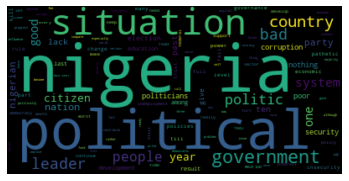

In [ ]:
## with the gigant string we can even generate wordclouds with the module WordCloud

from wordcloud import WordCloud

## we also have to import matplotlib for visualization
import matplotlib.pyplot as plt

## We can now input the big string for samsung frequencies into wordcloud
wordcloud = WordCloud(collocations=False).generate(feelings_frequencies[0])

## and create a figure using plt - matplotlib
print ("FEELINGS WORD CLOUD \n")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_FEELINGS.png')
plt.show()


ADVICE WORD CLOUD 



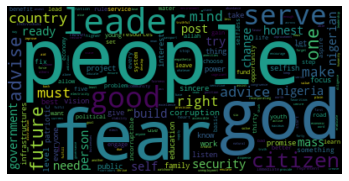

In [ ]:
## with the gigant string we can even generate wordclouds with the module WordCloud

from wordcloud import WordCloud

## we also have to import matplotlib for visualization
import matplotlib.pyplot as plt

## We can now input the big string for samsung frequencies into wordcloud
wordcloud = WordCloud(collocations=False).generate(Advic_frequencies[0])

## and create a figure using plt - matplotlib
print ("ADVICE WORD CLOUD \n")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_ADVICE.png')
plt.show()


SOLUTION WORD CLOUD 



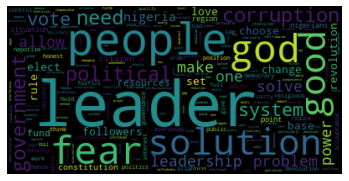

In [ ]:
## with the gigant string we can even generate wordclouds with the module WordCloud

from wordcloud import WordCloud

## we also have to import matplotlib for visualization
import matplotlib.pyplot as plt

## We can now input the big string for samsung frequencies into wordcloud
wordcloud = WordCloud(collocations=False).generate(solution_frequencies[0])

## and create a figure using plt - matplotlib
print ("SOLUTION WORD CLOUD \n")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_SOLUTION.png')
plt.show()


VALUE WORD CLOUD 



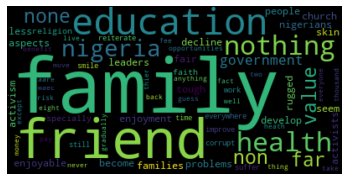

In [ ]:
## with the gigant string we can even generate wordclouds with the module WordCloud

from wordcloud import WordCloud

## we also have to import matplotlib for visualization
import matplotlib.pyplot as plt

## We can now input the big string for samsung frequencies into wordcloud
wordcloud = WordCloud(collocations=False).generate(value_frequencies[0])

## and create a figure using plt - matplotlib
print ("VALUE WORD CLOUD \n")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_VALUE.png')
plt.show()


In [ ]:
## We can see that the words situation, nigeria and political are very frequent and not that informative
## But we can remove instances of the word 'situation', 'nigeria' and 'political' from the string and the cloud
feelings_without_gov = feelings_frequencies[0].replace('government', '')
feelings_without_cont = feelings_without_gov.replace('country', '')
feelings_without_pol = feelings_without_cont.replace('politic', '')
feelings_without_party = feelings_without_pol.replace('party', '')
feelings_without_nation = feelings_without_party.replace('nation', '')
feelings_without_people = feelings_without_nation.replace('people', '')
feelings_without_leader = feelings_without_people.replace('leader', '')
feelings_without_al = feelings_without_leader.replace('al', '')
feelings_without_nig = feelings_without_al.replace('nigeria', '')
feelings_without_citizen = feelings_without_nig.replace('citizen', '')
feelings_without_system = feelings_without_citizen.replace('system', '')
feelings_without_ten = feelings_without_system.replace('ten', '')
feelings_without_though = feelings_without_ten.replace('though', '')
feelings_without_year = feelings_without_though.replace('year', '')
feelings_without_ians = feelings_without_year.replace('ians', '')
feelings_without_one = feelings_without_ians.replace('one', '')
feelings_without_political = feelings_without_one.replace('political', '')
feelings_without_situation = feelings_without_political.replace('situation', '')


Nigeria politics WORD CLOUD 



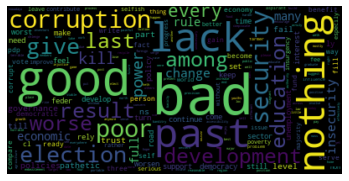

In [ ]:
## Lets repeat the clouds

## We can now input the big string for samsung frequencies into wordcloud
wordcloud = WordCloud(collocations=False).generate(feelings_without_situation)
print ("Nigeria politics WORD CLOUD \n")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('NG_feeling_w.png')
plt.show()


In [ ]:
## we can also make a wordcloud of whatever shape we want

import numpy as np
from PIL import Image

## lets import the logo of samsung, as a numpy array, 
## meaning a numeric array
mask_advice = np.array(Image.open("politics.png"))

print(mask_advice)


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  7 187 187 ... 187 187   7]
 [  7 187 187 ... 187 187   7]
 [ 65   7   7 ...   7   7  65]]


In [ ]:
## we can also make a wordcloud of whatever shape we want

import numpy as np
from PIL import Image

## lets import the logo of samsung, as a numpy array, 
## meaning a numeric array
mask_solution = np.array(Image.open("solt.png"))

print(mask_solution)


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [239 239 239]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [237 237 237]
  [237 237 237]
  [238 238 238]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [237 237 237]
  [237 237 237]
  [238 238 238]]

 ...

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [237 237 237]
  [237 237 237]
  [238 238 238]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [237 237 237]
  [237 237 237]
  [238 238 238]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [239 239 239]]]


In [ ]:
## we can also make a wordcloud of whatever shape we want

import numpy as np
from PIL import Image

## lets import the logo of samsung, as a numpy array, 
## meaning a numeric array
mask_value = np.array(Image.open("solt.png"))

print(mask_value)


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [239 239 239]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [237 237 237]
  [237 237 237]
  [238 238 238]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [237 237 237]
  [237 237 237]
  [238 238 238]]

 ...

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [237 237 237]
  [237 237 237]
  [238 238 238]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [237 237 237]
  [237 237 237]
  [238 238 238]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [239 239 239]]]


FEELINGS WORD CLOUD 



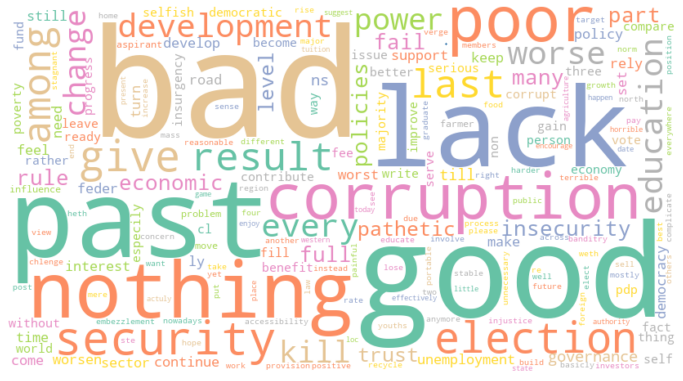

In [ ]:
## lets apply mask_samsung in the mask parameter of wordcloud

wordcloud = WordCloud(collocations=False,
                      contour_width=3, 
                      contour_color='steelblue',
                      width = 400,
                      colormap = 'Set2', 
                      mask = mask_feelings,background_color="white").generate(feelings_without_situation)
print ("FEELINGS WORD CLOUD \n")
plt.figure(figsize=[12,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_NG_FEELINGS_w.png')
plt.show()

ADVICE WORD CLOUD 



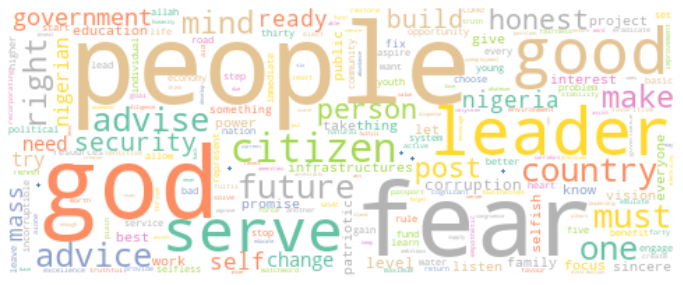

In [ ]:
## lets apply mask_samsung in the mask parameter of wordcloud

wordcloud = WordCloud(collocations=False,
                      contour_width=3, 
                      contour_color='steelblue',
                      width = 400,
                      colormap = 'Set2', 
                      mask = mask_advice,background_color="white").generate(Advic_frequencies[0])
print ("ADVICE WORD CLOUD \n")
plt.figure(figsize=[12,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_NG_ADVICE.png')
plt.show()

SOLUTION WORD CLOUD 



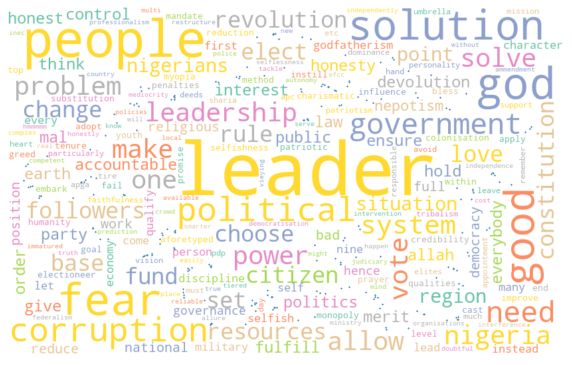

In [ ]:
## lets apply mask_samsung in the mask parameter of wordcloud

wordcloud = WordCloud(collocations=False,
                      contour_width=3, 
                      contour_color='steelblue',
                      width = 400,
                      colormap = 'Set2', 
                      mask = mask_solution,background_color="white").generate(solution_frequencies[0])
print ("SOLUTION WORD CLOUD \n")
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_NG_SOLUTION.png')
plt.show()

VALUE WORD CLOUD 



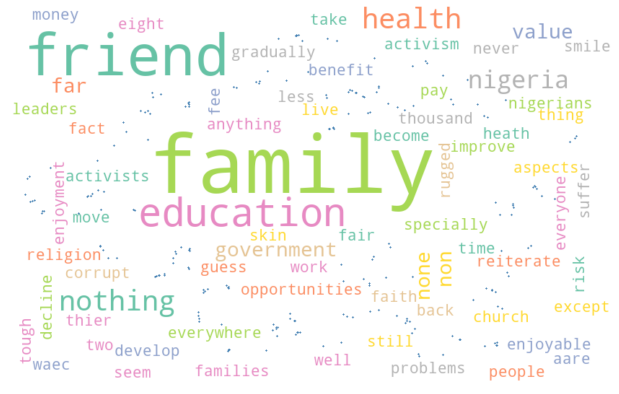

In [ ]:
## lets apply mask_samsung in the mask parameter of wordcloud

wordcloud = WordCloud(collocations=False,
                      contour_width=3, 
                      contour_color='steelblue',
                      width = 400,
                      colormap = 'Set2', 
                      mask = mask_value,background_color="white").generate(value_frequencies[0])
print ("VALUE WORD CLOUD \n")
plt.figure(figsize=[12,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_NG_VALUE.png')
plt.show()

In [ ]:
## First we need to build a dataframe of words and frequencies
## We already have our pairs of words and frequencies from feelings_frequencies[1]
## we can use those pairs ('nigeria', 0.030006978367062107),('political', 0.028611304954640614), ('situation', 0.017445917655268667),('government', 0.017445917655268667),)
# to create a dataframe
## here we take the 20 most frequent words, and exclude the word 'good' which is always the most frequent

df_feelings_frequencies = pd.DataFrame(feelings_frequencies[1][1:21],columns=['word','frequency'])
df_feelings_frequencies


,word,frequency
0,political,0.028611
1,situation,0.017446
2,government,0.017446
3,country,0.013259
4,bad,0.012561
5,people,0.011165
6,politics,0.011165
7,leaders,0.011165
8,good,0.009072
9,system,0.008374


In [ ]:
## First we need to build a dataframe of words and frequencies
## We already have our pairs of words and frequencies from feelings_frequencies[1]
## we can use those pairs ('nigeria', 0.030006978367062107),('political', 0.028611304954640614), ('situation', 0.017445917655268667),('government', 0.017445917655268667),)
# to create a dataframe
## here we take the 20 most frequent words, and exclude the word 'good' which is always the most frequent

df_ADVICE_frequencies = pd.DataFrame(Advic_frequencies[1][1:21],columns=['word','frequency'])
df_ADVICE_frequencies


,word,frequency
0,god,0.021277
1,fear,0.021277
2,serve,0.016367
3,good,0.016367
4,leader,0.013093
5,future,0.009820
6,advise,0.009820
7,citizens,0.009820
8,country,0.009820
9,advice,0.009820


In [ ]:
## First we need to build a dataframe of words and frequencies
## We already have our pairs of words and frequencies from feelings_frequencies[1]
## we can use those pairs ('nigeria', 0.030006978367062107),('political', 0.028611304954640614), ('situation', 0.017445917655268667),('government', 0.017445917655268667),)
# to create a dataframe
## here we take the 20 most frequent words, and exclude the word 'good' which is always the most frequent

df_SOLUTION_frequencies = pd.DataFrame(solution_frequencies[1][1:21],columns=['word','frequency'])
df_SOLUTION_frequencies


,word,frequency
0,people,0.021073
1,leader,0.015326
2,fear,0.015326
3,god,0.015326
4,solution,0.013410
5,good,0.013410
6,corruption,0.009579
7,political,0.009579
8,government,0.009579
9,need,0.009579


In [ ]:
## First we need to build a dataframe of words and frequencies
## We already have our pairs of words and frequencies from feelings_frequencies[1]
## we can use those pairs ('nigeria', 0.030006978367062107),('political', 0.028611304954640614), ('situation', 0.017445917655268667),('government', 0.017445917655268667),)
# to create a dataframe
## here we take the 20 most frequent words, and exclude the word 'good' which is always the most frequent

df_VALUE_frequencies = pd.DataFrame(value_frequencies[1][1:21],columns=['word','frequency'])
df_VALUE_frequencies


,word,frequency
0,friends,0.131737
1,education,0.053892
2,health,0.023952
3,nothing,0.023952
4,nigeria,0.017964
5,value,0.011976
6,none,0.011976
7,non,0.011976
8,far,0.011976
9,friend,0.011976


In [ ]:
## For creating a graph, it is important to make sure the numbers in the column are read as numbers and not as strings
## To ensure that we transform all values in the column 'frequency' to numeric with the function from pandas pd.to_numeric

df_feelings_frequencies['frequency'] = df_feelings_frequencies['frequency'].apply(pd.to_numeric)


In [ ]:
## For creating a graph, it is important to make sure the numbers in the column are read as numbers and not as strings
## To ensure that we transform all values in the column 'frequency' to numeric with the function from pandas pd.to_numeric

df_ADVICE_frequencies['frequency'] = df_ADVICE_frequencies['frequency'].apply(pd.to_numeric)


In [ ]:
## For creating a graph, it is important to make sure the numbers in the column are read as numbers and not as strings
## To ensure that we transform all values in the column 'frequency' to numeric with the function from pandas pd.to_numeric

df_SOLUTION_frequencies['frequency'] = df_SOLUTION_frequencies['frequency'].apply(pd.to_numeric)


In [ ]:
## For creating a graph, it is important to make sure the numbers in the column are read as numbers and not as strings
## To ensure that we transform all values in the column 'frequency' to numeric with the function from pandas pd.to_numeric

df_VALUE_frequencies['frequency'] = df_VALUE_frequencies['frequency'].apply(pd.to_numeric)


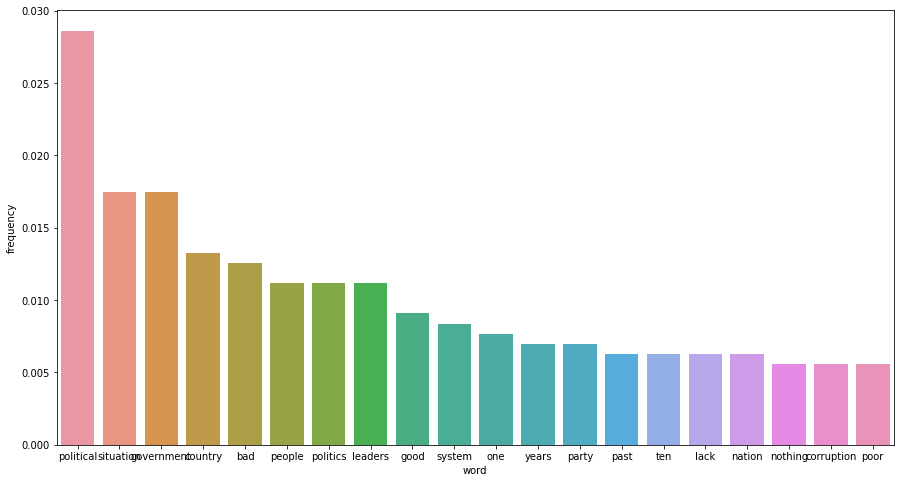

In [ ]:
## Now we import the module to build nice graphs called seabon

import seaborn as sns

## we define the size of the figure
plt.figure(figsize=(15,8))

## we create the barplot with frequency on the y-axis, words on the x-axis, using the dataframe df_feelings_frequencies
sns.barplot(x='word',y='frequency',data=df_feelings_frequencies)

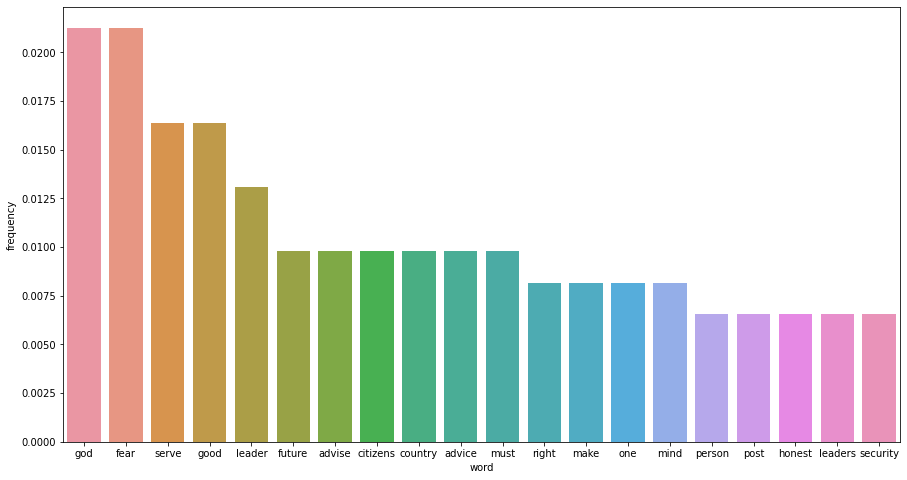

In [ ]:
## Now we import the module to build nice graphs called seabon

import seaborn as sns

## we define the size of the figure
plt.figure(figsize=(15,8))

## we create the barplot with frequency on the y-axis, words on the x-axis, using the dataframe df_feelings_frequencies
sns.barplot(x='word',y='frequency',data=df_ADVICE_frequencies)

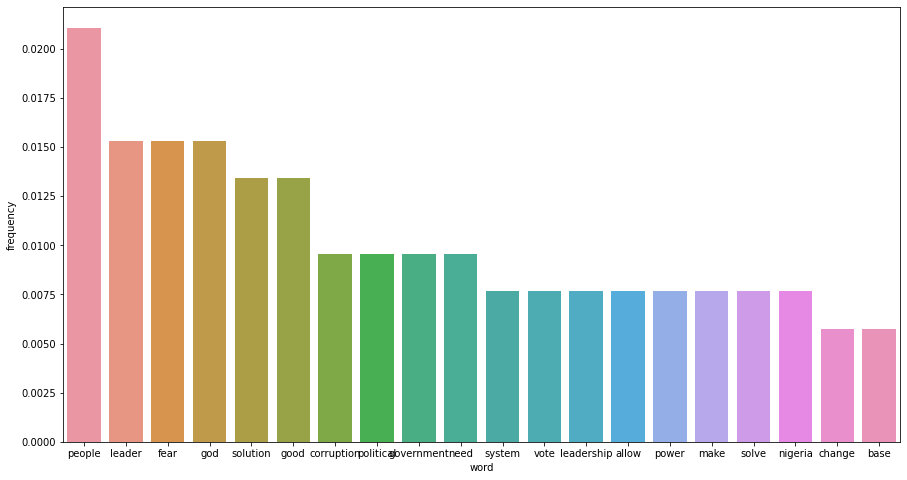

In [ ]:
## Now we import the module to build nice graphs called seabon

import seaborn as sns

## we define the size of the figure
plt.figure(figsize=(15,8))

## we create the barplot with frequency on the y-axis, words on the x-axis, using the dataframe df_feelings_frequencies
sns.barplot(x='word',y='frequency',data=df_SOLUTION_frequencies)

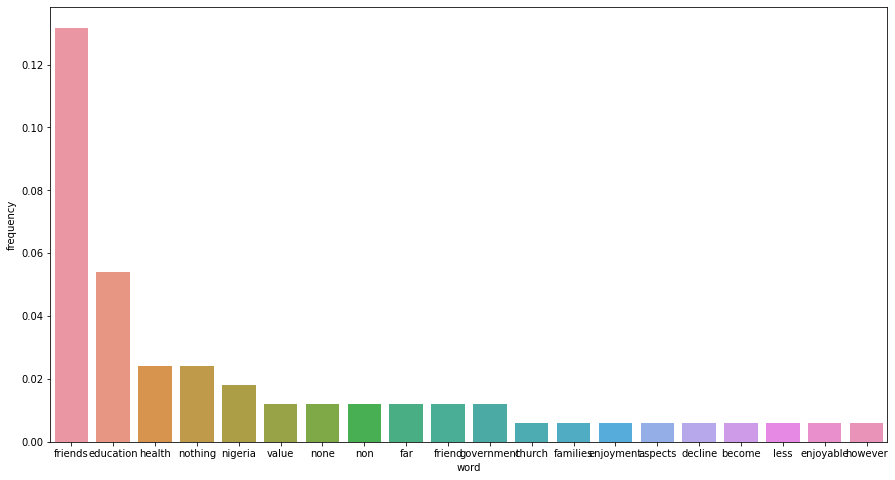

In [ ]:
## Now we import the module to build nice graphs

import seaborn as sns

## we define the size of the figure
plt.figure(figsize=(15,8))

## we create the barplot with frequency on the y-axis, words on the x-axis, using the dataframe df_value_frequencies
sns.barplot(x='word',y='frequency',data=df_VALUE_frequencies)

In [ ]:
## we install the package afinn

!pip install afinn

     |████████████████████████████████| 52 kB 930 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=234e9894813dcdea32d78558ae34e76c3a38c2d2a8bbff4ba2f01056f22a40ad
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
## we import the module and set the afinn engine

from afinn import Afinn
afinn = Afinn(language='en')

In [ ]:
## we calculate the afinn score, the higher the more positive

feelings_sentiment_score = afinn.score(feelings_frequencies[0])


In [ ]:
## we calculate the afinn score, the higher the more positive

advice_sentiment_score = afinn.score(Advic_frequencies[0])


In [ ]:
## we calculate the afinn score, the higher the more positive

solution_sentiment_score = afinn.score(solution_frequencies[0])


In [ ]:
## we calculate the afinn score, the higher the more positive

value_sentiment_score = afinn.score(value_frequencies[0])

In [ ]:

print("peoples' sentiment score: ",feelings_sentiment_score)

peoples' sentiment score:  -144.0


In [ ]:

print("peoples' sentiment score: ",advice_sentiment_score)

peoples' sentiment score:  92.0


In [ ]:

print("peoples' sentiment score: ",solution_sentiment_score)

peoples' sentiment score:  29.0


In [ ]:

print("peoples' sentiment score: ",value_sentiment_score)

peoples' sentiment score:  5.0


In [ ]:
# Start with feeling:
text = df.Political_feeling[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("first_feeling.png")

In [ ]:
text = " ".join(feeling for feeling in df.Political_feeling)
print ("There are {} words in the combination of all feeling.".format(len(text)))

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update([])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
politics = np.array(Image.open("politics.png"))
politics

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_politics_mask = np.ndarray((politics.shape[0],politics.shape[1]), np.int32)

for i in range(len(politics)):
    transformed_politics_mask[i] = list(map(transform_format, politics[i]))

In [ ]:
# Check the expected result of your mask
transformed_politics_mask

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=10000, mask=transformed_politics_mask,
               stopwords=stopwords, contour_width=3, contour_color='teal')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("politics.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
## We can see that the words phone, nokia and samsung are very frequent and not that informative
## But we can remove instances of the word 'phone', 'nokia' and 'samsung' from the string and the cloud

without_gov = politics[0].replace('government', '')
without_Ng = without_gov.replace('Nigeria', '')

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("map.png"))
wordcloud_map = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[17,17])
plt.imshow(wordcloud_map.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("NG_map.png", format="png")

plt.show()

In [ ]:
for review in df[:]['Political_feeling']:
  print(review)

In [ ]:
## for each review we can have the clean text and word frequencies 

for feel in df[:8]['Political_feeling'].apply(pre_processing_pipeline):
  
  ## print preprocessed text
  print(feel[0])

  ## print word frequencies
  print(feel[1])

  ## print word list
  print(feel[2])

  print('\n')


### Incase of any enquiry regarding this project or survey, kindly reach out to me on azeez.hamzat@um6p.ma